# **DL Brain Tumor Classification**


# **Training and Saving the Model**

In [1]:
# Get Dataset
!git clone https://github.com/nessprjct/DataSet.git

Cloning into 'DataSet'...
remote: Enumerating objects: 6010, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 6010 (delta 4), reused 0 (delta 0), pack-reused 5958 (from 2)
Receiving objects: 100% (6010/6010), 117.80 MiB | 12.51 MiB/s, done.
Resolving deltas: 100% (105/105), done.
Updating files: 100% (7207/7207), done.


In [2]:
%cd DataSet/Brain_tumor_lowData

/content/DataSet/Brain_tumor_lowData


In [3]:
!pwd

/content/DataSet/Brain_tumor_lowData


In [4]:
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Flatten # Changed import statement
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping
import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import vgg16
import numpy as np
import random
import os
from tqdm import tqdm
import pickle
import cv2

In [5]:
# Define necessary constants
TEST_DIR = '/content/DataSet/Brain_tumor_lowData/Testing'
TRAIN_DIR = '/content/DataSet/Brain_tumor_lowData/Training'
IMG_SIZE = 128
CATEGORIES = ["glioma","meningioma","NO_Tumor","pituitary"]

**TRAIN**

In [6]:
# Creating training dataset
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TRAIN_DIR,category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
          img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
          # Check if img_array is None
          if img_array is not None:
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
          else:
            print(f"Warning: Could not read image at {os.path.join(path,img)}")

    random.shuffle(training_data)

create_training_data()
#np.save('train_data.npy', training_data)
print(len(training_data))

print("train")
print()
X_train = np.array([i[0] for i in training_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_train = [i[1] for i in training_data]

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

100%|██████████| 192/192 [00:00<00:00, 567.66it/s]


864
train



**TEST**

In [7]:
# Creating testing dataset
testing_data = []

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(TEST_DIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
          img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          testing_data.append([new_array, class_num])

    random.shuffle(testing_data)

create_testing_data()
#np.save('testing_data.npy', testing_data)
print(len(testing_data))

print("testing")
print()
X_test= np.array([i[0] for i in testing_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_test = [i[1] for i in testing_data]

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

100%|██████████| 192/192 [00:00<00:00, 612.00it/s]


768
testing



 **VGG16**

In [ ]:
# TRAIN MODEL

In [8]:
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Flatten # Changed import statement
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping
import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import vgg16
import numpy as np

In [9]:
tensorboard = TensorBoard(log_dir='./VGG16logs', histogram_freq=0,
                          write_graph=True, write_images=False)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [10]:
# We'll use VGG16 to quickly define a model
vgg16_model = vgg16.VGG16(include_top = False, input_shape = (IMG_SIZE,IMG_SIZE,3)) #Added include_top=False
vgg16_model.summary()
type(vgg16_model)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

keras.src.models.functional.Functional

In [11]:
# Dropping last layers
model = Sequential()
for layer in vgg16_model.layers[:-3]:
    model.add(layer)


for layer in model.layers:
    layer.trainable = True

# Adding flatten layer to convert tensor into a vector
model.add(Flatten())

# Adding last Dense Layer
model.add(Dense(4,activation = 'softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │         131,076 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,126,148 (38.63 MB)

 Trainable params: 10,126,148 (38.63 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= "adam",
              metrics=['accuracy'],
              )

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [14]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=25)

Epoch 1/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 589s 22s/step - accuracy: 0.2919 - loss: 3.2485
Epoch 2/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 624s 22s/step - accuracy: 0.4840 - loss: 1.1708
Epoch 3/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 620s 22s/step - accuracy: 0.6374 - loss: 0.9620
Epoch 4/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 623s 22s/step - accuracy: 0.6975 - loss: 0.7366
Epoch 5/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 621s 22s/step - accuracy: 0.7333 - loss: 0.6677
Epoch 6/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 579s 21s/step - accuracy: 0.8123 - loss: 0.4717
Epoch 7/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 621s 21s/step - accuracy: 0.8823 - loss: 0.3996
Epoch 8/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 621s 21s/step - accuracy: 0.7455 - loss: 0.8356
Epoch 9/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 623s 21s/step - accuracy: 0.7741 - loss: 0.5737
Epoch 10/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 625s 22s/step - accuracy: 0.8767 - loss: 0.3480
Epoch 11/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 577s 21s/step - accuracy: 0.8946 - loss: 0.2810
Epoch 12/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 623s 21s/step

In [15]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

model.save("modelMC.h5") # replace model.h5 in "Runner"

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(Y_test, y_pred_bool))

24/24 ━━━━━━━━━━━━━━━━━━━━ 156s 6s/step - accuracy: 0.7220 - loss: 2.4121


Test loss: 2.536916494369507
Test accuracy: 0.7174479365348816
12/12 ━━━━━━━━━━━━━━━━━━━━ 147s 12s/step
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       192
           1       0.58      0.57      0.58       192
           2       0.71      0.91      0.79       192
           3       0.88      0.61      0.72       192

    accuracy                           0.72       768
   macro avg       0.73      0.72      0.71       768
weighted avg       0.73      0.72      0.71       768



# **Loading and Making Predictions**



---



In [16]:
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Define categories
CATEGORIES = ["glioma", "meningioma", "NO_Tumor", "pituitary"]

# Load the trained model
model = load_model("/content/DataSet/Brain_tumor_lowData/modelMC.h5")

# Function to predict image category
def predict_image(image_path):
    IMG_SIZE = 128
    img_array = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img_array is None:
        print("Error: Image not found!")
        return None
    resized_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    normalized_img = resized_img / 255.0
    input_image = np.expand_dims(normalized_img, axis=0)
    predictions = model.predict(input_image)
    predicted_class_index = np.argmax(predictions)
    predicted_category = CATEGORIES[predicted_class_index]
    return predicted_category, predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
Predicted Category: glioma
Confidence Scores: [9.9999309e-01 3.6344949e-07 6.5703180e-06 6.1390247e-18]


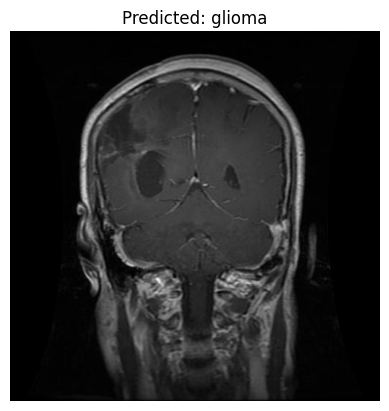

In [18]:
# Example usage
test_image_path = "/content/Tr-gl_0010.jpg"  # Replace with your image path
predicted_category, confidence_scores = predict_image(test_image_path)

if predicted_category:
    print(f"Predicted Category: {predicted_category}")
    print(f"Confidence Scores: {confidence_scores}")

    # Display the image
    img = cv2.imread(test_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_category}")
    plt.axis("off")
    plt.show()